# Excercise 3: Audio Processing

To complete the exercise, follow the instructions and complete the missing code and write the answers where required. All points, except the ones marked with (N points) are mandatory. The optional tasks require more independent work and some extra effort. Without completing them you can get at most 75 points for the exercise (the total number of points is 100 and results in grade 10). Sometimes there are more optional exercises and you do not have to complete all of them, you can get at most 100 points.

In this exercise, you will generate simple sounds, vary their parameters and perform frequency analysis. You will also familiarize yourself with basic audio filtering and effects.

**Required libraries:** In this exercise you will be reading and writing sound files as well as processing waveforms. Loading and saving will be done using the `soundfile` package, some of the processing and visualization will require the LibROSA library `librosa` that you must install and import to your notebook.


In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

# Import library for sound visualization
import IPython.display as ipd

# Import librosa to work with sound and soundfile for IO
import librosa as lb
import librosa.display as lbd
import soundfile

In [4]:
# Run this cell to download the data used in this exercise
import zipfile, urllib.request, io, os
if not os.path.isfile("token"):
    print("Downloading exercise material")
    zipfile.ZipFile(io.BytesIO(urllib.request.urlopen("https://data.vicos.si/lukacu/multimedia/exercise3.zip").read())).extractall()

## Assignment 1: Generating sounds

The first assignment will focus on generating simple waveforms, plotting them and playing
them via speakers. It consists of three subtasks in total.

 * Generate a sine wave and plot it. The sine wave is a function of time

    \begin{equation}
    f(t) = A \sin{(\omega t + \phi)}
    \end{equation}

    where $A$ is the amplitude, $\omega$ is the angular frequency (i.e. the frequency in Hz multiplied by $2\pi$), and $\phi$ is the phase (in radians). Use the standard sampling frequency of 44.1 kHz. That means that you have to calculate the value of the waveform 44100 times for each second of your recording.

   Start with the following parameters: $A = 1$, $\omega = 2\pi \cdot 440$ Hz, $\phi = 0$. Plot the first 100 samples of the waveform (this shoould correspond to a single oscillation). You can use the `matplotlib.pyplot.plot` function to plot the waveform. You can use the `numpy.linspace` function to generate the time axis.

    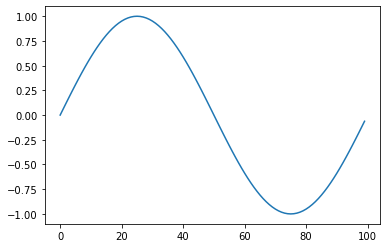

   Experiment with different values of the parameters. What happens when you change the amplitude? What happens when you change the frequency? What happens when you change the phase? Plot some of the waveforms you generated and write your observations below.

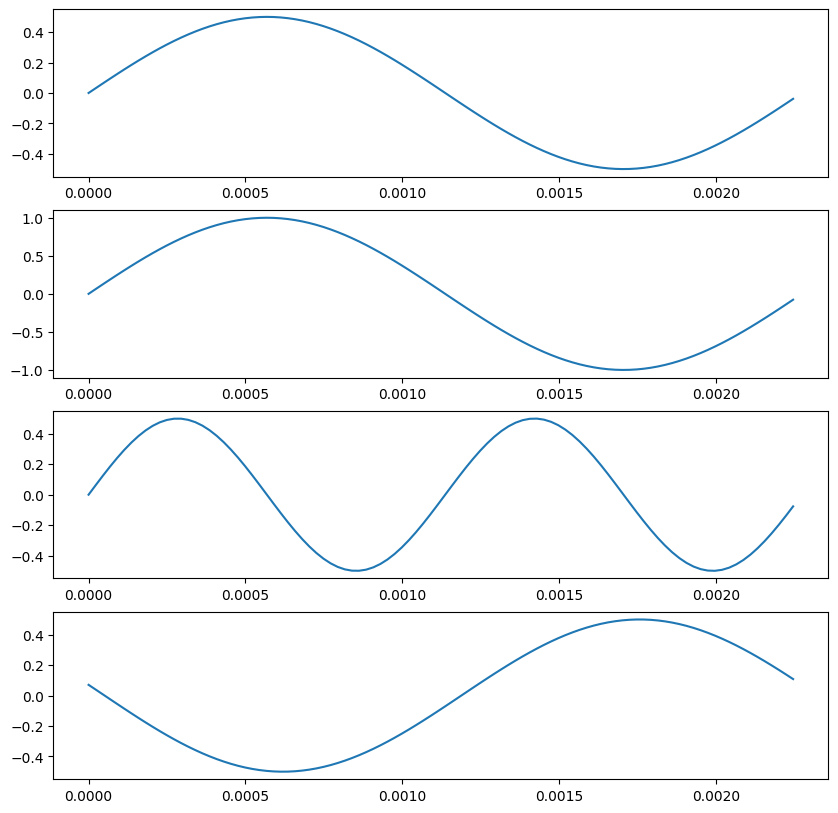

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

# Import library for sound visualization
import IPython.display as ipd

# Import librosa to work with sound and soundfile for IO
import librosa as lb
import librosa.display as lbd
import soundfile


sr = 44100  # Sampling rate
f = 440  # Frequency in Hz
A = 0.5  # Amplitude
t = 4  # Duration in seconds
phase = 0  # Phase in radians

w = 2 * np.pi * f

x = np.linspace(0.0, 1.0*t, num=sr*t)
y = A * np.sin(w * x + phase)
y1 = A*2 * np.sin(w * x + phase)
y2 = A * np.sin(w*2 * x + phase)
y3 = A * np.sin(w * x + phase+3)

_, ax = plt.subplots(4, 1, figsize=(10,10))
ax[0].plot(x[:100], y[:100])
ax[1].plot(x[:100], y1[:100])
ax[2].plot(x[:100], y2[:100])
ax[3].plot(x[:100], y3[:100])
plt.show()

 * Using <b>IPython.display.Audio</b>, you can play an audio signal:

In [2]:
display(ipd.Audio(y, rate=sr)) # sr = sampling rate

 * <b>soundfile.write</b> allows you to save the NumPy array of generated audio signal as a WAV file.

In [6]:
# y = audio signal, sr = sample rate
soundfile.write('output_audio.wav', y, sr)

 * The <b>librosa.display.waveshow</b> allows us to plot the amplitude envelope of a waveform. Plot only the first oscillation of the selected sine wave.

    Note, that if $y$ is monophonic, a filled curve is drawn between $\left[-\mathrm{abs}(y), \mathrm{abs}(y)\right]$. However, if $y$ is stereo, then the curve is drawn between $\left[\mathrm{abs}(y[1]), \mathrm{abs}(y[0])\right]$, so that the left and right channels are drawn above and below the axis, respectively.

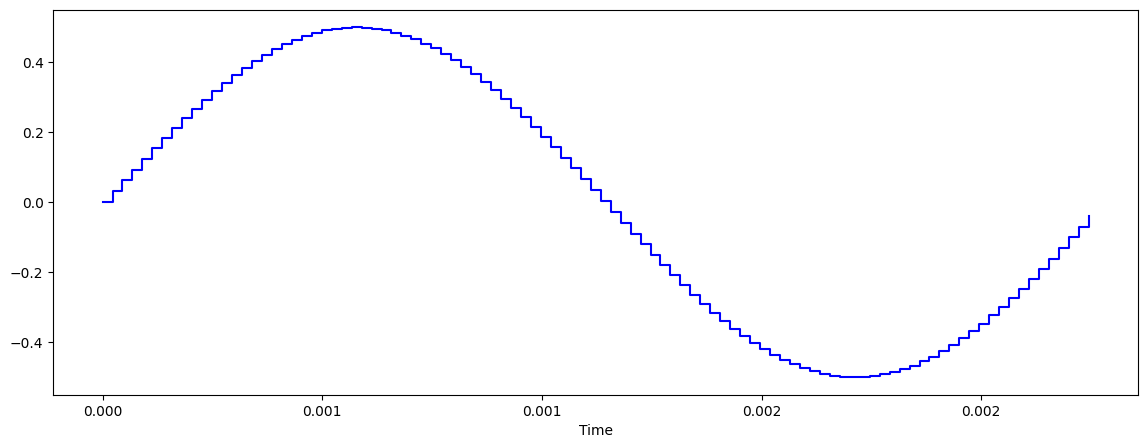

In [7]:
plt.figure(figsize=(14, 5))

lbd.waveshow(y[:100], sr=sr, color="blue")

 * Sounds encountered in real life situations are never as clean as the sinusoids you generated in the previous assignment. Try adding some noise to the waveform, then plot and listen to the result. Experiment with different types of noise! For better visibility, plot only the first oscillation of the selected waveform.

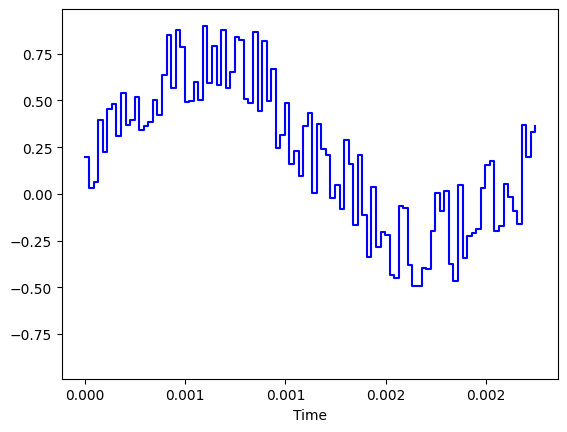

In [3]:
import random
y5 = np.copy(y)
for i in range(0, len(y5)):
    y5[i] += random.randint(0, 5) * 0.1
lbd.waveshow(y5[:100], sr=sr, color="blue")
display(ipd.Audio(y5, rate=sr)) # sr = sampling rate
soundfile.write('output_noise.wav', y5, sr)

 *  Harmonics are what gives different instruments their sound color or timbre. They are softer multiples of the primary frequency. Try adding multiples of the primary frequency at a lower amplitude to your sinusoid and listen to it. Experiment with odd and even multiples.

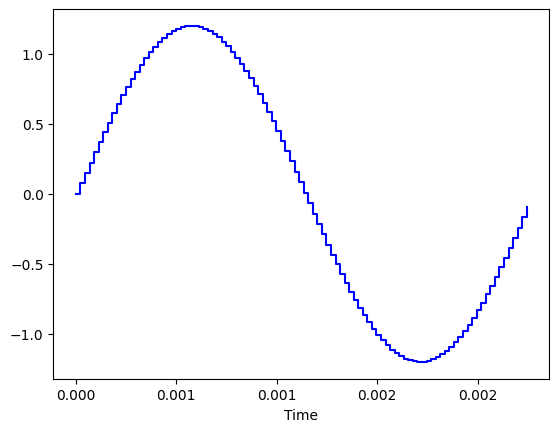

In [9]:
base = np.copy(y)
harms = [[],[],[],[]]
for i in range(0,len(base)):
    harms[0].append(base[i] * 0.3)
    harms[1].append(base[i] * 0.4)
    harms[2].append(base[i] * 0.5)
    harms[3].append(base[i] * 0.2)

final = base + harms[0] + harms[1] + harms[2] + harms[3]
lbd.waveshow(final[:100], sr=sr, color="blue")
display(ipd.Audio(final, rate=sr)) # sr = sampling rate

 * **(5 points)** Write a function to generate non-sinusoidal waveforms of your choice like square, triangle or sawtooth. You can also experiment with more exotic sounds, like chirp. Implement at least three different sounds.

    Do not use `scipy.signal` functions here, implement the equations yourself. Also pay attention to the frequency of the signal, do not generate sounds below 20Hz as those are not perceived as tones by humans.

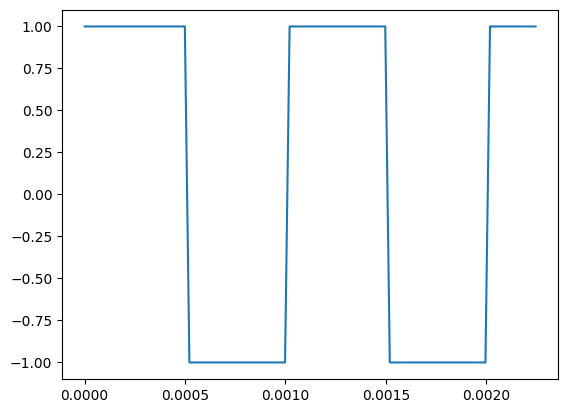

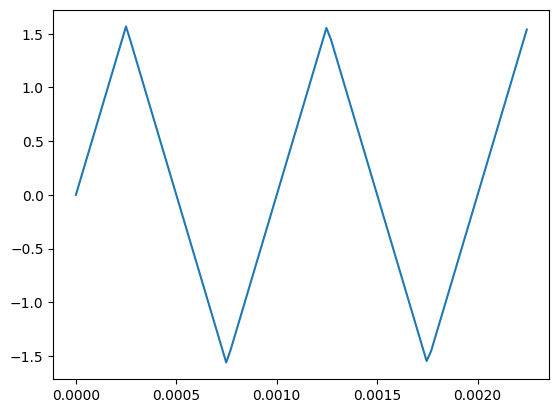

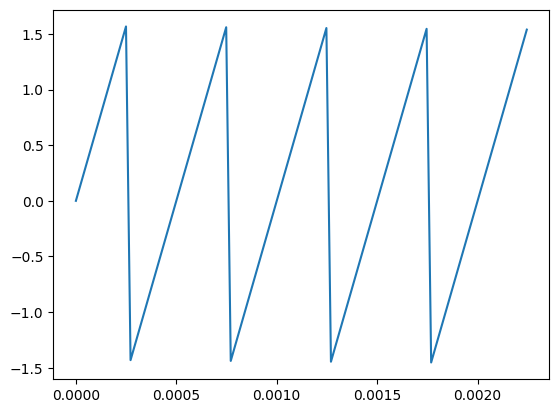

In [42]:
f = 1000
sr = 44100
t = np.linspace(0.0, 1.0, num=sr)

sin = np.sin(2 * np.pi * f * t)
def compare(x):
    if x >= 0:
        return 1
    else:
        return -1
square = list(map(compare, sin))
plt.plot(t[:100], square[:100])
plt.show()
display(ipd.Audio(square, rate=sr)) # sr = sampling rate

triangle = np.arcsin(sin)
plt.plot(t[:100], triangle[:100])
plt.show()
display(ipd.Audio(triangle, rate=sr)) # sr = sampling rate

sawtooth = np.arctan(np.tan(2 * np.pi * f * t))
plt.plot(t[:100], sawtooth[:100])
plt.show()
display(ipd.Audio(sawtooth, rate=sr)) # sr = sampling rate

 * **(5 points)** Now that you know how to generate primitive waveforms you can generate a simple tune. Write a script that generates the following sequence of notes in a list below. Determine suitable note duration, for better effect instert a small pause between notes.

In [28]:
song = ['A', 'A', 'E', 'E', 'F#', 'F#', 'E', 'E', 'D', 'D', 'C#', 'C#', 'B', 'B', 'A', 'A']
notes = {
    'A': 440,
    'B': 494,
    'C#': 554,
    'D': 587,
    'E': 659,
    'F#': 740,
}
sr = 44100
duration = 0.5

note_waves = {}
for note, f in notes.items():
    t = np.linspace(0.0, duration, num=int(sr*duration))
    wave = np.sin(2 * np.pi * f * t)
    note_waves[note] = wave

song_final = np.array([])
for note in song:
    song_final = np.append(song_final, note_waves[note])
    song_final = np.append(song_final, np.zeros(int(sr*0.1)))

display(ipd.Audio(song_final, rate=sr)) # sr = sampling rate

## Assignment 2:  Frequency analysis

Due to the high sampling rates, visually interpreting the digital audio signal is usually difficult. Transforming the signal to the frequency spectrum allows us to interpret the signal content more directly.

 * Calculate the Fourier transform of a simple waveform using Scipy function <b><a href="https://docs.scipy.org/doc/scipy/tutorial/fft.html">fft</a></b>. You also need to divide the result by the number of points used for the FFT, which is equal to the signal length by default. Since the result is complex and symmetrical, you will only use the positive part to plot the frequency components. Take the absolute value of the result and then use the first $\frac{F_s}{2}$ values (where $F_s$ is the sampling rate) to get useful values. The resulting spectrum should go from $0$ to $\frac{F_s}{2}$, which is the highest theoretical frequency that can be contained in the signal (per the <b>Nyquist theorem</b>). Plot the results for all signals you generated in <i>Assignment 1</i>.

    <b>Question:</b> How do the formula parameters influence the frequency spectrum?

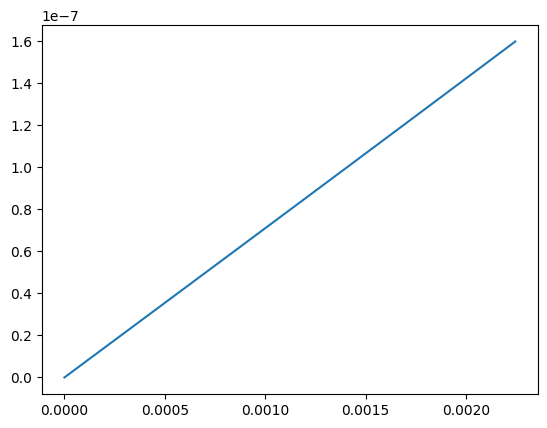

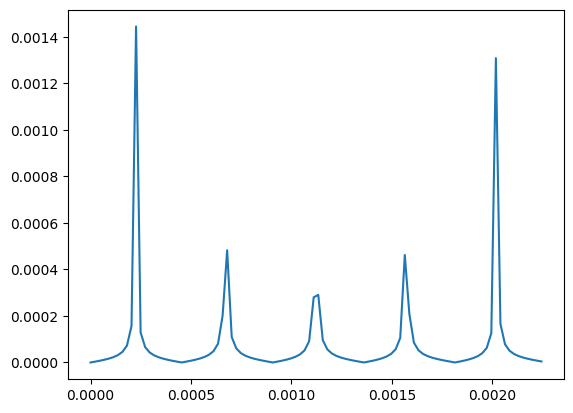

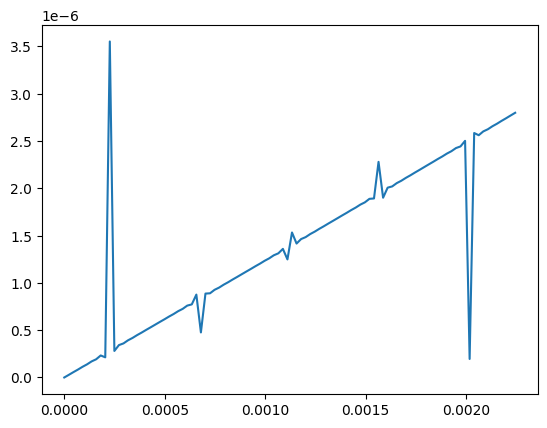

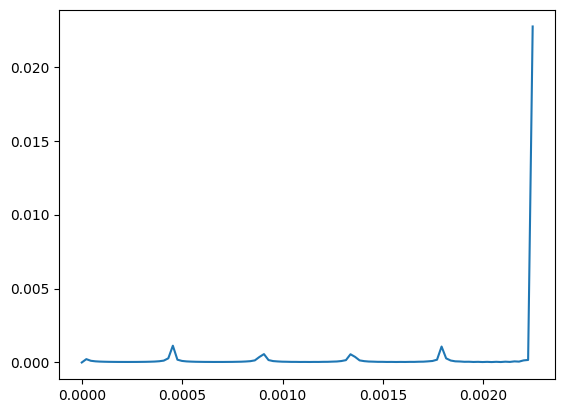

In [55]:
from scipy.fft import fft

sr = 44100  # Sampling rate
f = 440  # Frequency in Hz
A = 0.5  # Amplitude
t = 4  # Duration in seconds
phase = 0  # Phase in radians

w = 2 * np.pi * f

x = np.linspace(0.0, 1.0*t, num=sr*t)
y = A * np.sin(w * x + phase)

y_fft = fft(y)
y_fft = y_fft / len(y)
y_fft = abs(y_fft)
y_fft = y_fft[:int(sr/2)]
plt.plot(x[:100], y_fft[:100])
plt.show()

square_fft = fft(square)
square_fft = square_fft / len(square)
square_fft = abs(square_fft)
square_fft = square_fft[:int(sr/2)]
plt.plot(x[:100], square_fft[:100])
plt.show()

triangle_fft = fft(triangle)
triangle_fft = triangle_fft / len(triangle)
triangle_fft = abs(triangle_fft)
triangle_fft = triangle_fft[:int(sr/2)]
plt.plot(x[:100], triangle_fft[:100])
plt.show()

sawtooth_fft = fft(sawtooth)
sawtooth_fft = sawtooth_fft / len(sawtooth)
sawtooth_fft = abs(sawtooth_fft)
sawtooth_fft = sawtooth_fft[:int(sr/2)]
plt.plot(x[:100], sawtooth_fft[:100])
plt.show()

 * **(5 points)** Aliasing can occur when the signal is sampled too sparsely, which causes high frequencies included in the signal to reflect back to lower spectrum and produce errors in the frequency analysis. Use one of the signals from <i>Assignment 1</i> and sample it with a frequency below the Nyquist frequency (i.e. the sampling rate should be lower than twice the highest frequency present in the signal). Calculate and plot the frequency spectrum. Start with a single sine wave and then use other waveforms. Also experiment with autio samples that are provided with the exercise.

    <b>Discussion question:</b> Considering the human hearing range, does the standard sampling frequency of 44.1 kHz seem arbitrary?

In [5]:
# TODO: Visualize the aliasing problem on one of the signals from Assignment 1
# sample spacing

raise NotImplementedError()

 * **(5 points)** The Fourier transform is a powerful tool, but it is not the only way to analyze the frequency content of a signal. Another way is to use the <b>Short-time Fourier transform (STFT)</b>, which is a Fourier transform of a windowed signal. The window is shifted along the signal and the resulting spectra are stacked together to form a spectrogram. The STFT is implemented in the <b>librosa.stft</b> function. Use it to calculate the STFT of one of the signals. Plot the spectrogram using <b>librosa.display.specshow</b> (note that for visualization purposes we should discard the phase information and then scale the amplitudes to logarithmic scale using `lb.amplitude_to_db`).
 
    Test both methods on one of the periodic signals you have generated as well as a sample from the audio files provided with the exercise (e.g. `piano.wav`).

    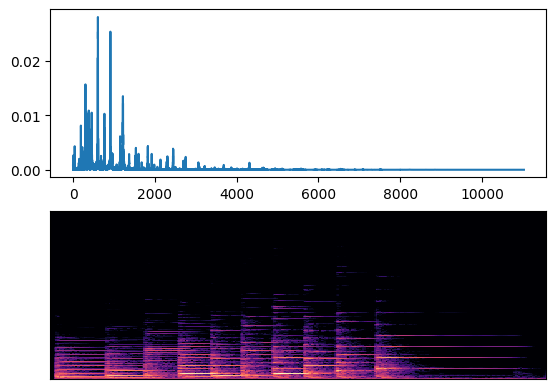

    <b>Discussion question:</b> What is the difference between the STFT and the Fourier transform? Where is STFT used? What are the advantages and disadvantages of STFT?

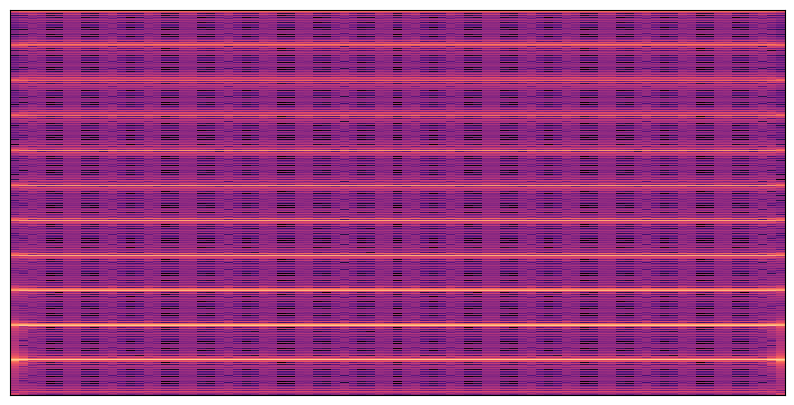

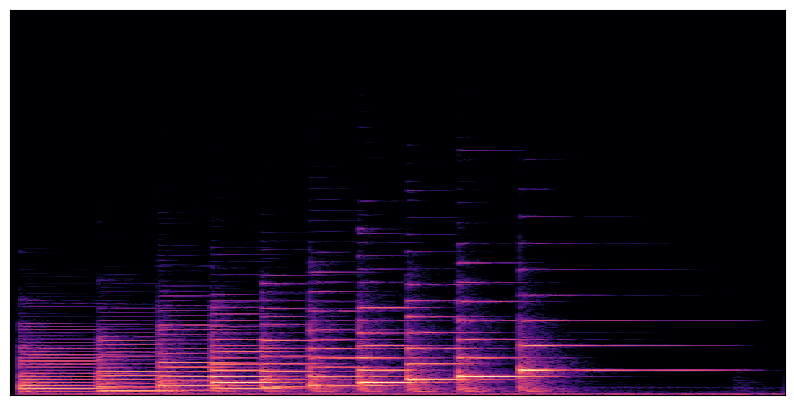

In [66]:
from librosa.display import specshow

def spectrogram(y, sr, window_size, hop_size):
    y_stft = lb.stft(y, n_fft=window_size, hop_length=hop_size)
    db = lb.amplitude_to_db(np.abs(y_stft), ref=np.max)
    return db
spec = spectrogram(sawtooth, sr, window_size=2048, hop_size=512)
plt.figure(figsize=(10,5))
specshow(spec, sr=sr)
plt.show()

y_piano ,sr_piano = lb.load('piano.wav')
piano = spectrogram(y_piano, sr_piano, window_size=2048, hop_size=512)
plt.figure(figsize=(10,5))
specshow(piano, sr=sr_piano)
plt.show()
# sample spacing

## Assignment 3: Filtering

Audio signals can be processed to extract or attenuate certain frequency ranges. Since the design of audio filters is a large field, you will only focus on simple low- and high-pass Gaussian filters and their effects on audio signals.

<i>Note: It might be hard to hear the difference when using laptop speakers, therefore consider listening to the result using headphones.</i>


 *  Use the included function <b>gaussian_kernel</b> to calculate a kernel for performing a <b>low-pass</b> operation on an audio signal. Use the function <b>np.convolve</b> to perform the filtering. Plot and listen to the result. Choose a signal that will produce obvious results.

    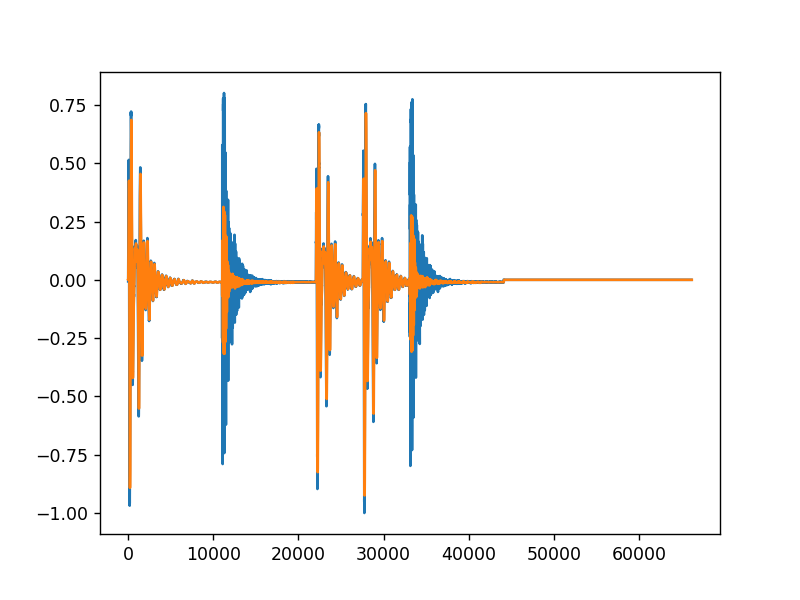

In [67]:
def gaussian_kernel(width, sigma):
    # width is the width of the produced kernel
    # sigma defines the shape of the Gaussian function
    
    x = np.linspace(-width / 2, width / 2, width)
    y = np.exp(-x ** 2 / (2 * sigma ** 2));
    y = y / np.sum(y); # normalize
    
    return y

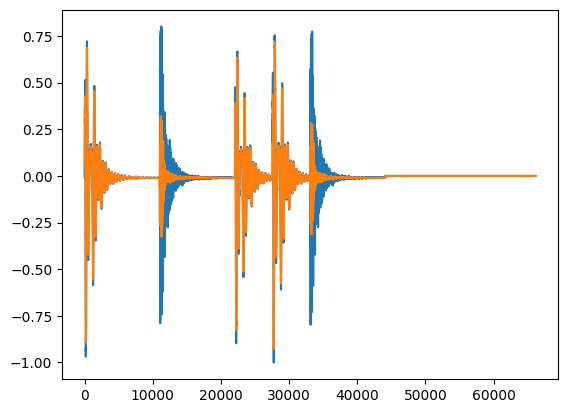

In [75]:
# Load drums.wav audio file. 
y_sl, sr_sl = lb.load('drums.wav')

gaussian = gaussian_kernel(50, 50)
# Filter the signal y_sl using the provided gaussian_kernel function and your selected kernel
y_filtered = np.convolve(y_sl, gaussian, mode='same')

# Plot the results
plt.figure()
plt.plot(y_sl)       # Plot the unfiltered signal
plt.plot(y_filtered) # Plot the filtered signal over it

In [76]:
# Listen to the original audio file
display(ipd.Audio(y_sl, rate=sr_sl, element_id="original"))

# Listen to the filtered audio file
display(ipd.Audio(y_filtered, rate=sr_sl, element_id="filtered"))

 - Listen to the samples above. Write what do you notice to the field below.


 * Convert the low-pass Gaussian kernel into a <b>high-pass</b> filter. This can be achieved by alternately multiplying the kernel coefficients by $-1$. The resulting kernel will remove the low frequency components of the signal an only retain the high frequencies. Test on a sound of your choice. You can also use sounds provided.

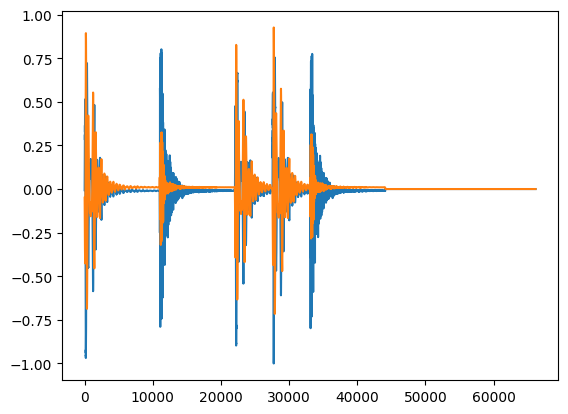

In [77]:
# Load the audio file
y_sl_hp, sr_sl_hp = lb.load('drums.wav')

gaussian_hp = -gaussian
# Filter the signal y_sl_hp using the provided gaussian_kernel function and your high-pass filter kernel
y_filtered_hp = np.convolve(y_sl_hp, gaussian_hp, mode='same')
# Plot the results
plt.figure()
plt.plot(y_sl_hp)       # Plot the unfiltered signal
plt.plot(y_filtered_hp) # Plot the filtered signal over it
plt.show()

In [78]:
display(ipd.Audio(y_filtered_hp, rate=sr_sl_hp))

 - Listen to the filtere audio file, what do you notice? How do you interpret the results?

## Assignment 4: Effects

Special kinds of filters can also produce other effects. Here you will implement some of them.

 * **Delay**: A delay time-shifts the signal and adds it to itself. Write a function that 
 introduces a delay of a specified duration. You can again use the function **np.convolve** or perform a delay as a weighted sum of original and shifted signal using **scipy.ndimage.interpolation.shift**. Experiment with different delay values, below and above 100ms. Do you notice a difference?

In [85]:
from scipy.ndimage import shift

def delay(input_sig, delay, weight):
    shifted = shift(input_sig, delay, mode='constant')
    return weight * input_sig + (1 - weight) * shifted
y, sr = lb.load('guitar1.wav')
y_delay = delay(y, 100, 0.2)
display(ipd.Audio(y_delay, rate=sr))

* **Echo**: Echo is a combination of multiple delays combined with attenuation. Write a function that accepts the number of echoes and their corresponding damping factors. Display and play the results.

In [86]:
def echo(input_sig, delays, weights):
    output = input_sig
    for i in range(len(delays)):
        output = delay(output, delays[i], weights[i])
    return output

y_echo = echo(y, [100, 200, 300, 400, 500], [0.5, 0.4, 0.3, 0.2, 0.1])
display(ipd.Audio(y_echo, rate=sr))

 * **(5 points)** **Flanger**: Is an effect produced by introducing a delay which depends on an outside oscillator. Put simpler, the delay for each sample of the output is not constant but changes based on a sinusoidal function.

In [37]:
# TODO

raise NotImplementedError()

  * **(5 points)** **Distortion**: This effect changes the frequency content of the signal by adding gain to high energy frequencies and thus producing clipping. Implement it by using the formula from the lecture slides

    $$
    y(n) = \frac{(1 + k) x(n)}{1 + k |x(n)|},
    $$

    where k controls the amount of distortion.

    **Question**: How do these effects change the signal in both time and frequency
    domains? If you want to complete this task it is important to know this, not to just implement the effect.



In [38]:
# TODO

raise NotImplementedError()